In [228]:
#!pip install requests
#!pip install pandas
#!pip install matplotlib

In [221]:
import matplotlib.pyplot as pl

In [16]:
import pandas as pd

In [6]:
import requests

In [24]:
import datetime

In [19]:
import json

In [7]:
url = "https://fixer-fixer-currency-v1.p.rapidapi.com/symbols"

In [8]:
headers = {
    'x-rapidapi-host': "fixer-fixer-currency-v1.p.rapidapi.com",
    'x-rapidapi-key': "X"
    }

In [9]:
response = requests.request("GET", url, headers=headers)

In [60]:
symbols = json.loads(response.text)["symbols"]

In [335]:
symbols

{'AED': 'United Arab Emirates Dirham',
 'AFN': 'Afghan Afghani',
 'ALL': 'Albanian Lek',
 'AMD': 'Armenian Dram',
 'ANG': 'Netherlands Antillean Guilder',
 'AOA': 'Angolan Kwanza',
 'ARS': 'Argentine Peso',
 'AUD': 'Australian Dollar',
 'AWG': 'Aruban Florin',
 'AZN': 'Azerbaijani Manat',
 'BAM': 'Bosnia-Herzegovina Convertible Mark',
 'BBD': 'Barbadian Dollar',
 'BDT': 'Bangladeshi Taka',
 'BGN': 'Bulgarian Lev',
 'BHD': 'Bahraini Dinar',
 'BIF': 'Burundian Franc',
 'BMD': 'Bermudan Dollar',
 'BND': 'Brunei Dollar',
 'BOB': 'Bolivian Boliviano',
 'BRL': 'Brazilian Real',
 'BSD': 'Bahamian Dollar',
 'BTC': 'Bitcoin',
 'BTN': 'Bhutanese Ngultrum',
 'BWP': 'Botswanan Pula',
 'BYN': 'New Belarusian Ruble',
 'BYR': 'Belarusian Ruble',
 'BZD': 'Belize Dollar',
 'CAD': 'Canadian Dollar',
 'CDF': 'Congolese Franc',
 'CHF': 'Swiss Franc',
 'CLF': 'Chilean Unit of Account (UF)',
 'CLP': 'Chilean Peso',
 'CNY': 'Chinese Yuan',
 'COP': 'Colombian Peso',
 'CRC': 'Costa Rican Colón',
 'CUC': 'Cuban

In [26]:
print(datetime.datetime.now())

2019-08-25 07:52:25.987757


In [291]:
NUMBER_OF_DATES = 10

base = datetime.datetime.today()

dateList = [base - datetime.timedelta(days=n) for n in range(NUMBER_OF_DATES, -1,-1)]

dateListString =[date.strftime("%Y-%m-%d") for date in dateList]

#dateListString

In [268]:
urlsDate = [f"https://fixer-fixer-currency-v1.p.rapidapi.com/{dateListString[i]}" for i,e in enumerate(dateListString)]

In [59]:
#querystring2 = {"base":"USD","symbols":"CRC,EUR,BTC,CNY"} Importants

In [286]:
symbolsListString = ",".join([s for s in symbols])

In [297]:
querystring = {"base":"USD","symbols":symbolsListString} # dolar agains 168 currencies

In [298]:
datesmeta = {"DATE":dateListString}
symbolsmeta = {f"{symbol}":[] for symbol in symbols}
data = {**datesmeta, **symbolsmeta}

In [337]:
#data #empty structure

In [300]:
for url in urlsDate:
    nresponse = requests.request("GET",url, headers=headers, params=querystring)
    nrates = json.loads(nresponse.text)["rates"]
    for symbol in nrates:
        data[symbol].append(nrates[symbol])

In [338]:
#data #after the requests

In [302]:
dataframe = pd.DataFrame.from_dict(data)

In [324]:
pd.set_option('display.max_columns', None)#TO SHOW ALL COLS
dataframe
#AMD,CLP,AOA,AMD,KMF,KPW,MRO,NGN,SOS,SYP,XAF #values from 400 to 1000, close to the CRC currency

,DATE,AED,AFN,ALL,AMD,ANG,AOA,ARS,AUD,AWG,AZN,BAM,BBD,BDT,BGN,BHD,BIF,BMD,BND,BOB,BRL,BSD,BTC,BTN,BWP,BYN,BYR,BZD,CAD,CDF,CHF,CLF,CLP,CNY,COP,CRC,CUC,CUP,CVE,CZK,DJF,DKK,DOP,DZD,EGP,ERN,ETB,EUR,FJD,FKP,GBP,GEL,GGP,GHS,GIP,GMD,GNF,GTQ,GYD,HKD,HNL,HRK,HTG,HUF,IDR,ILS,IMP,INR,IQD,IRR,ISK,JEP,JMD,JOD,JPY,KES,KGS,KHR,KMF,KPW,KRW,KWD,KYD,KZT,LAK,LBP,LKR,LRD,LSL,LTL,LVL,LYD,MAD,MDL,MGA,MKD,MMK,MNT,MOP,MRO,MUR,MVR,MWK,MXN,MYR,MZN,NAD,NGN,NIO,NOK,NPR,NZD,OMR,PAB,PEN,PGK,PHP,PKR,PLN,PYG,QAR,RON,RSD,RUB,RWF,SAR,SBD,SCR,SDG,SEK,SGD,SHP,SLL,SOS,SRD,STD,SVC,SYP,SZL,THB,TJS,TMT,TND,TOP,TRY,TTD,TWD,TZS,UAH,UGX,USD,UYU,UZS,VEF,VND,VUV,WST,XAF,XAG,XAU,XCD,XDR,XOF,XPF,YER,ZAR,ZMK,ZMW,ZWL
0,2019-08-15,3.673049,78.350980,109.096875,475.870105,1.784650,362.017497,57.249761,1.476703,1.8,1.704987,1.752946,2.01870,84.463971,1.760303,0.376980,1843.00,1,1.350750,6.90855,3.991600,1.001450,0.000097,68.914099,11.077980,2.048950,19600,2.015198,1.331750,1664.999828,0.976499,0.025764,710.904977,7.033993,3439.65,570.919956,1,26.5,98.895497,23.262302,177.720179,6.713898,51.184971,119.830074,16.580501,14.999660,29.229497,0.899233,2.183950,0.826850,0.827060,2.924978,0.827092,5.423602,0.826850,50.104987,9185.049825,7.673450,208.554996,7.842750,24.487504,6.649503,95.023497,293.000230,14354.00,3.531979,0.827092,71.745045,1193.00,42105.000200,123.940093,0.827092,134.590138,0.707498,106.086499,103.340169,69.735902,4080.200193,439.649762,900.074600,1212.499053,0.304150,0.833165,387.429904,8703.448714,1514.249692,177.170309,203.000178,15.250320,2.95274,0.60489,1.403100,9.599009,17.470982,3687.550349,55.373501,1516.750299,2667.803638,8.076350,357.000024,35.998989,15.500892,729.115029,19.613599,4.191984,60.505024,15.250320,363.659689,33.517503,9.019499,114.089887,1.554195,0.384990,0.99975,3.394198,3.397800,52.770993,160.249543,3.935251,6099.200123,3.640939,4.253596,105.999659,66.087403,917.725,3.750597,8.221403,13.742007,45.099497,9.639198,1.388985,1.320901,9299.999629,580.000250,7.458011,21560.79,8.748199,514.999996,15.340497,30.850373,9.432750,3.5,2.873601,2.314350,5.570103,6.77905,31.243006,2301.900090,25.262976,3694.049493,1,35.890003,8712.649460,9.987501,23208.50,117.273112,2.678111,587.990070,0.057822,0.000655,2.70255,0.728520,587.939769,106.918606,250.349874,15.260899,9001.199242,13.031995,322.000001
1,2019-08-16,3.673104,78.344504,108.960403,475.920403,1.784504,362.017504,54.816041,1.474904,1.8,1.705041,1.765404,2.01905,84.544041,1.763504,0.377025,1843.25,1,1.350750,6.90795,4.005904,0.999650,0.000096,68.914104,11.040398,2.049604,19600,2.015050,1.327550,1665.000362,0.978355,0.025663,708.095041,7.042904,3441.50,568.195041,1,26.5,99.534504,23.212204,177.720394,6.723704,51.245040,119.950393,16.573504,15.000358,29.228040,0.901350,2.177650,0.822380,0.822980,2.925040,0.823261,5.424304,0.822380,50.105040,9186.350390,7.672804,208.575040,7.844850,24.488040,6.661504,95.122504,292.710388,14223.05,3.546204,0.823261,71.142040,1192.90,42105.000352,123.910386,0.823261,134.203811,0.707804,106.375040,103.403804,69.797904,4079.350384,439.650384,899.718543,1208.490384,0.304304,0.833180,386.830383,8707.450383,1511.550382,177.170382,203.000348,15.250382,2.95274,0.60489,1.403039,9.623104,17.548039,3696.403758,55.445039,1518.550380,2662.194315,8.075450,357.000024,36.093504,15.503741,729.090378,19.659804,4.176039,60.535039,15.250377,363.703727,33.514504,9.012804,113.605039,1.555450,0.384985,0.99975,3.387550,3.397804,52.345504,159.765038,3.912550,6098.550374,3.641038,4.261404,106.250373,66.614604,912.665,3.750804,8.221404,13.308038,45.106038,9.663404,1.384504,1.320904,9300.000339,580.000338,7.458038,21560.79,8.747804,515.000338,15.193504,30.906504,9.428950,3.5,2.861404,2.313250,5.578304,6.77705,31.316038,2299.303635,25.263038,3693.903631,1,36.190367,9068.903624,9.987504,23208.50,116.519957,2.707383,591.990365,0.058465,0.000661,2.70255,0.729011,592.090364,107.630364,250.350364,15.304604,9001.203593,13.086037,322.000001
2,2019-08-17,3.673104,78.344504,108.960403,475.920403,1.784504,362.01750

In [342]:
similarToCR = ["AMD","CLP","AOA","AMD","KMF","KPW","MRO","NGN","SOS","SYP","XAF","CRC"]

In [333]:
{f"{key}":symbols[key] for key in symbols if key in similarToCR} 

{'AMD': 'Armenian Dram',
 'AOA': 'Angolan Kwanza',
 'CLP': 'Chilean Peso',
 'KMF': 'Comorian Franc',
 'KPW': 'North Korean Won',
 'MRO': 'Mauritanian Ouguiya',
 'NGN': 'Nigerian Naira',
 'SOS': 'Somali Shilling',
 'SYP': 'Syrian Pound',
 'XAF': 'CFA Franc BEAC'}

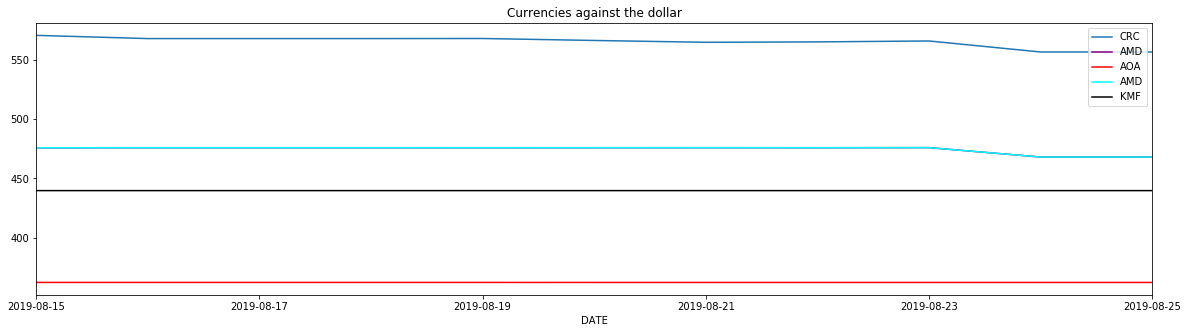

In [340]:
#"CRC,EUR,BTC,CNY"
f = pl.figure(figsize=(20,5))
ax = f.gca()

similarToCR = ["AMD","CLP","AOA","AMD","KMF","KPW","MRO","NGN","SOS","SYP","XAF"]

dataframe.plot(kind="line", x="DATE",y="CRC",ax=ax, title="Currencies against the dollar")
dataframe.plot(kind="line", x="DATE",y="AMD",color="purple",ax=ax)
#dataframe.plot(kind="line", x="DATE",y="CLP",color="yellow",ax=ax)
dataframe.plot(kind="line", x="DATE",y="AOA",color="red",ax=ax)
dataframe.plot(kind="line", x="DATE",y="AMD",color="cyan",ax=ax)
dataframe.plot(kind="line", x="DATE",y="KMF",color="black",ax=ax)
#dataframe.plot(kind="line", x="DATE",y="KPW",color="red",ax=ax)
#dataframe.plot(kind="line", x="DATE",y="MRO",color="red",ax=ax)
#dataframe.plot(kind="line", x="DATE",y="NGN",color="red",ax=ax)
#dataframe.plot(kind="line", x="DATE",y="SOS",color="red",ax=ax)
#dataframe.plot(kind="line", x="DATE",y="SYP",color="red",ax=ax)
#dataframe.plot(kind="line", x="DATE",y="XAF",color="red",ax=ax)

pl.show()

In [343]:
{f"{key}":data[key][0] for key in symbols if key in similarToCR} 

{'AMD': 475.870105,
 'AOA': 362.017497,
 'CLP': 710.904977,
 'CRC': 570.919956,
 'KMF': 439.649762,
 'KPW': 900.0746,
 'MRO': 357.000024,
 'NGN': 363.659689,
 'SOS': 580.00025,
 'SYP': 514.999996,
 'XAF': 587.99007}